# NAMA : LOUISE OLIVIA PANGGABEAN
# NIM : 09011282328032
# KELAS : SK3B

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis

In [36]:
df= pd.read_csv("C:/Users/ACER/Documents/data_balita.csv")

In [37]:
#head
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [38]:
#tail
df.tail()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
120994,60,perempuan,100.6,normal
120995,60,perempuan,98.3,stunted
120996,60,perempuan,121.3,normal
120997,60,perempuan,112.2,normal
120998,60,perempuan,109.8,normal


In [5]:
#shape untuk menampilkan jumlah baris dan kolom
df.shape

(120999, 4)

In [6]:
#info menampilkan informasi mengenai data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [7]:
#finding missing value
df.isnull().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

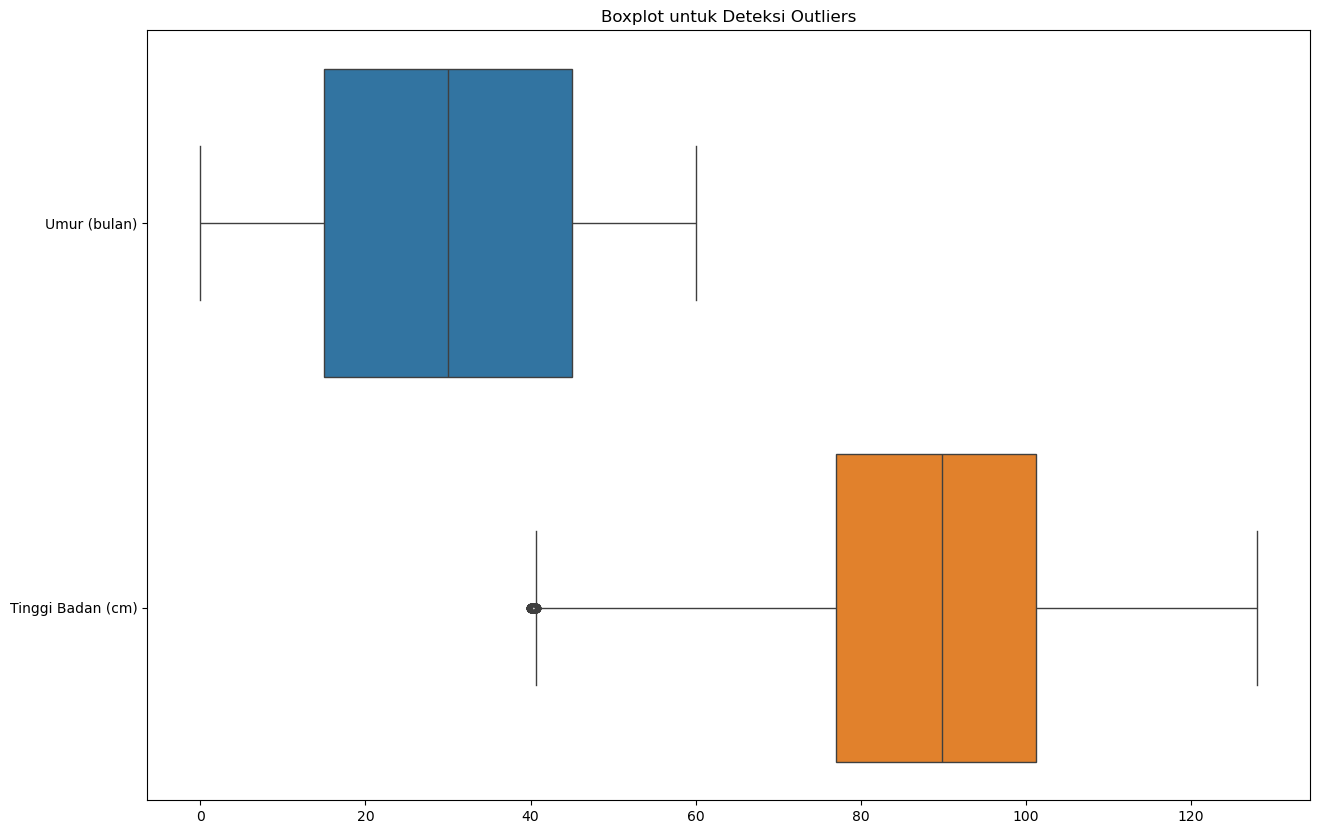

In [8]:
# Menggambar boxplot untuk setiap kolom numerik (outliers)
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient="h")
plt.title('Boxplot untuk Deteksi Outliers')
plt.show()

In [21]:
#menghitung jumlah outliers
numeric_df = df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
outliers


Umur (bulan)          0
Tinggi Badan (cm)    38
dtype: int64

In [44]:
#menghitung mean, median, modus,

numeric_df = df.select_dtypes(include=['number'])

numeric_df = df.select_dtypes(include=['number'])
print("---Mean---")
print(numeric_df.mean())
print (" ")
print("---Median---")
print(numeric_df.median())
print (" ")
print("---Mode---")
print(numeric_df.mode().iloc[0])
print (" ")
print("---Std---")
print(numeric_df.std())
print (" ")
print("---Var---")
print(numeric_df.var())
print (" ")
print("---Skew---")
print(numeric_df.skew())
print (" ")
print("---Kurtosis---")
kurtosis_values = df[['Umur (bulan)', 'Tinggi Badan (cm)']].apply(kurtosis)
print("Kurtosis:")
print(kurtosis_values)

---Mean---
Umur (bulan)         30.173803
Tinggi Badan (cm)    88.655434
dtype: float64
 
---Median---
Umur (bulan)         30.0
Tinggi Badan (cm)    89.8
dtype: float64
 
---Mode---
Umur (bulan)          1.0
Tinggi Badan (cm)    89.7
Name: 0, dtype: float64
 
---Std---
Umur (bulan)         17.575119
Tinggi Badan (cm)    17.300997
dtype: float64
 
---Var---
Umur (bulan)         308.884816
Tinggi Badan (cm)    299.324494
dtype: float64
 
---Skew---
Umur (bulan)        -0.015529
Tinggi Badan (cm)   -0.265469
dtype: float64
 
---Kurtosis---
Kurtosis:
Umur (bulan)        -1.189495
Tinggi Badan (cm)   -0.400538
dtype: float64


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Umur (bulan),120999.0,30.173803,17.575119,0.000000,15.0,30.0,45.0,60.0
Tinggi Badan (cm),120999.0,88.655434,17.300997,40.010437,77.0,89.8,101.2,128.0


In [16]:
numeric_df = df.select_dtypes(include=['number'])
# Korelasi antar variabel numerik
numeric_df.corr()


,Umur (bulan),Tinggi Badan (cm)
Umur (bulan),1.000000,0.843093
Tinggi Badan (cm),0.843093,1.000000


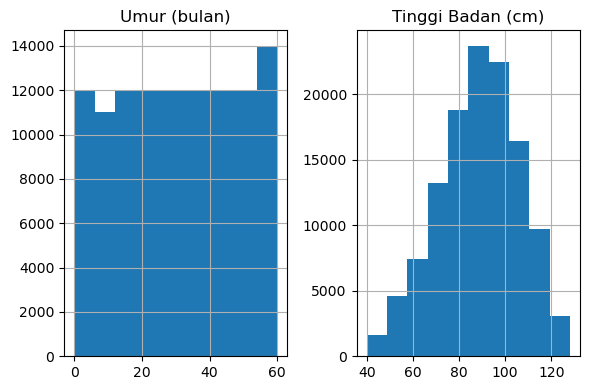

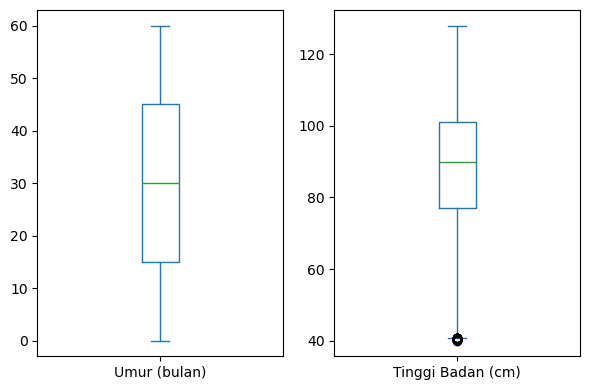

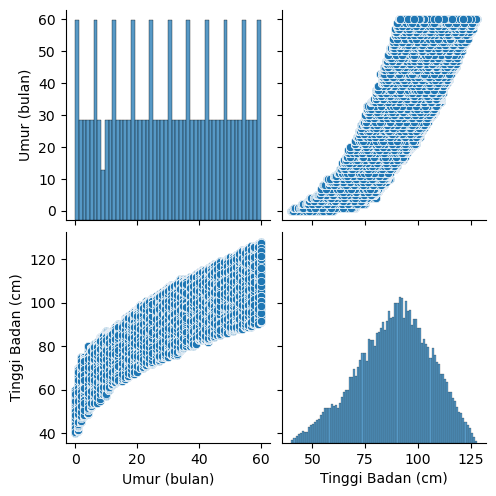

In [27]:
# Histogram
df.hist(figsize=(6, 4))
plt.tight_layout()
plt.show()

# Box Plot
df.plot(kind='box', subplots=True, layout=(len(df.columns)//2, 2), figsize=(6, 4))
plt.tight_layout()
plt.show()

# Scatter plot antara pasangan variabel numerik
sns.pairplot(df)
plt.show()


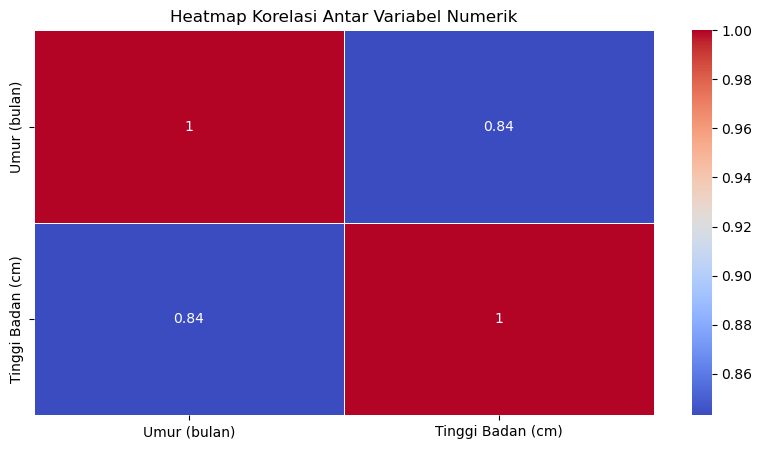

In [29]:
# Heatmap korelasi antar variabel numerik
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()